# Image Thresholding

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Simple Thresholding

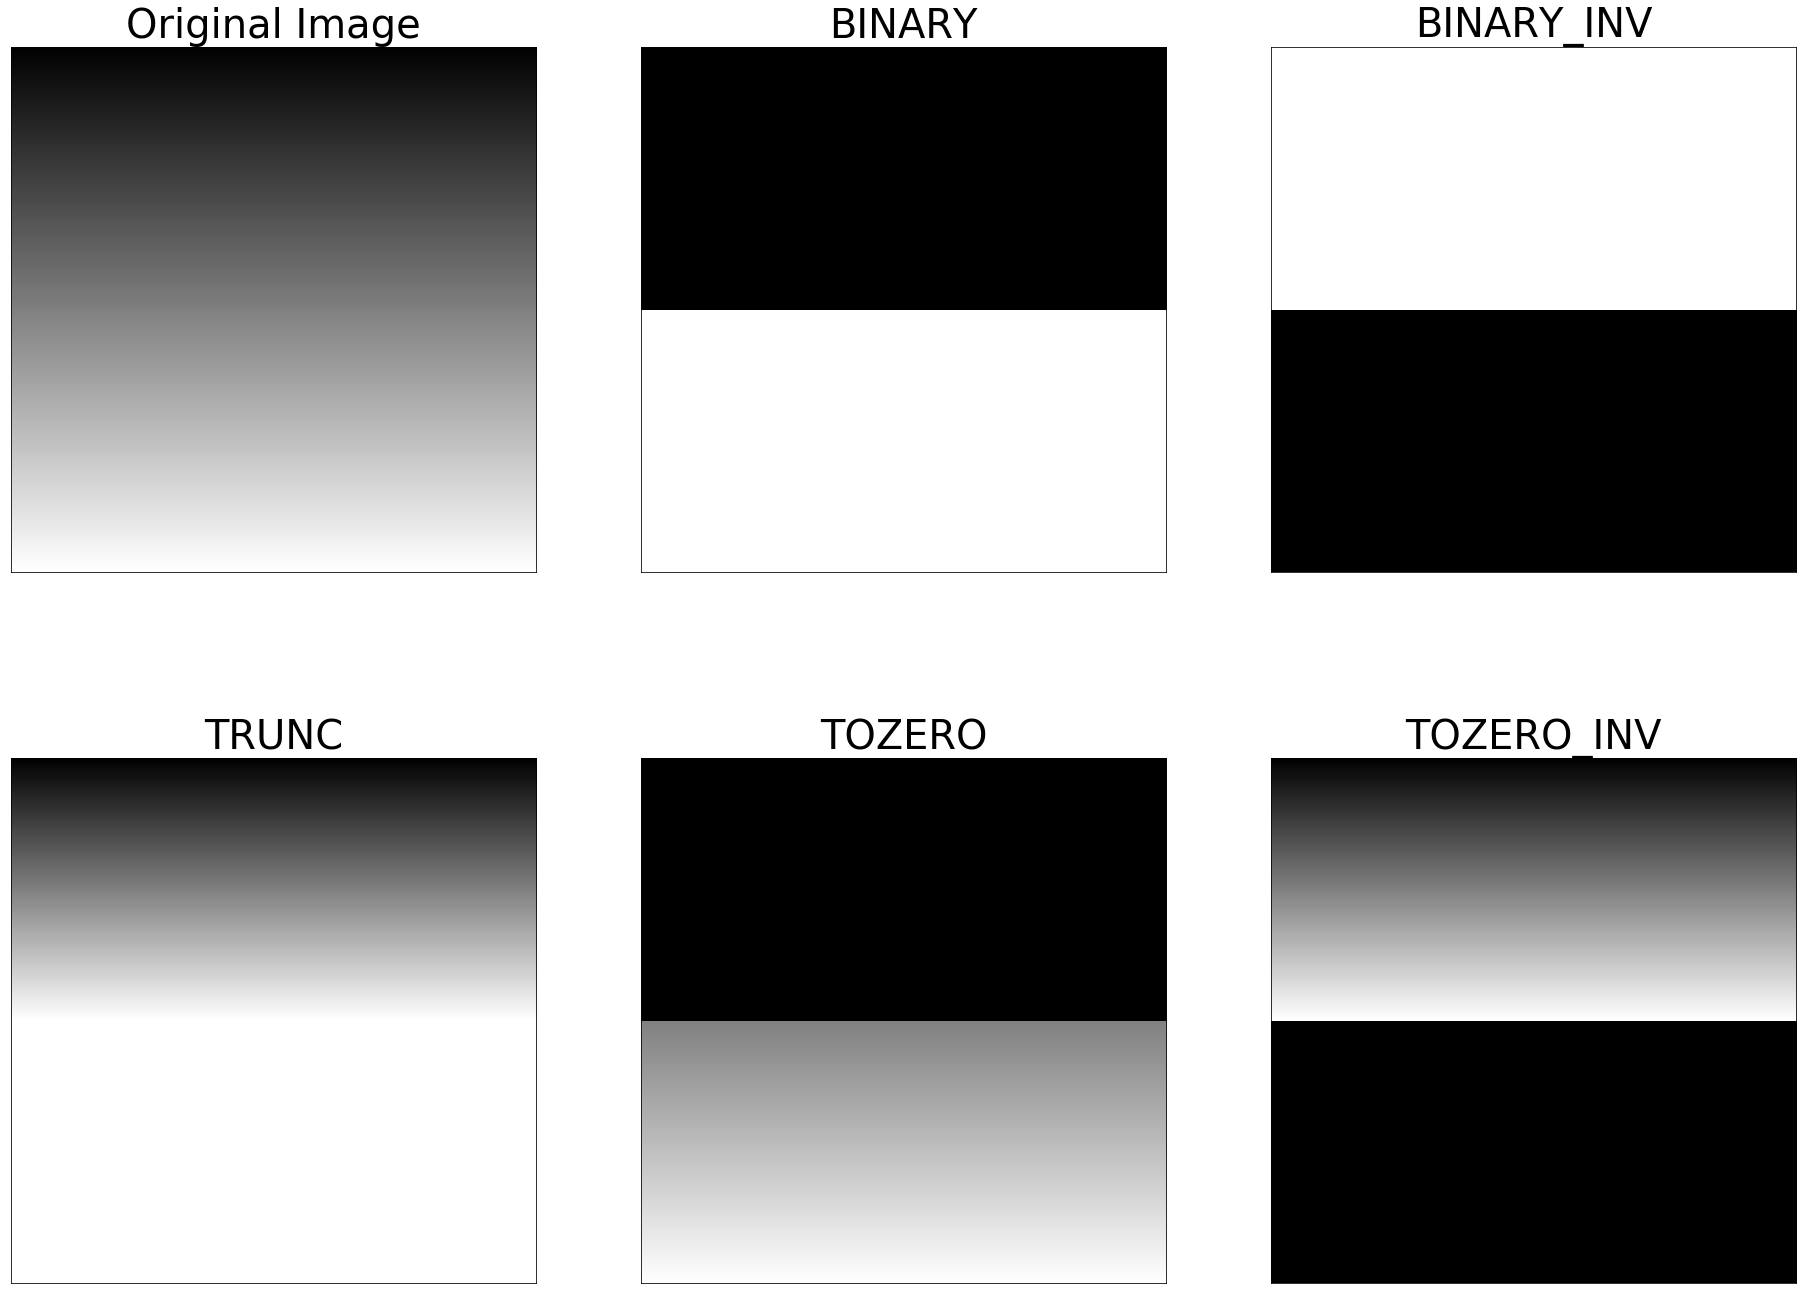

In [2]:
img=cv2.imread('gradient.png',0)
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles=['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images=[img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(32,24))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=40)
    plt.xticks([]),plt.yticks([])
    
plt.show()

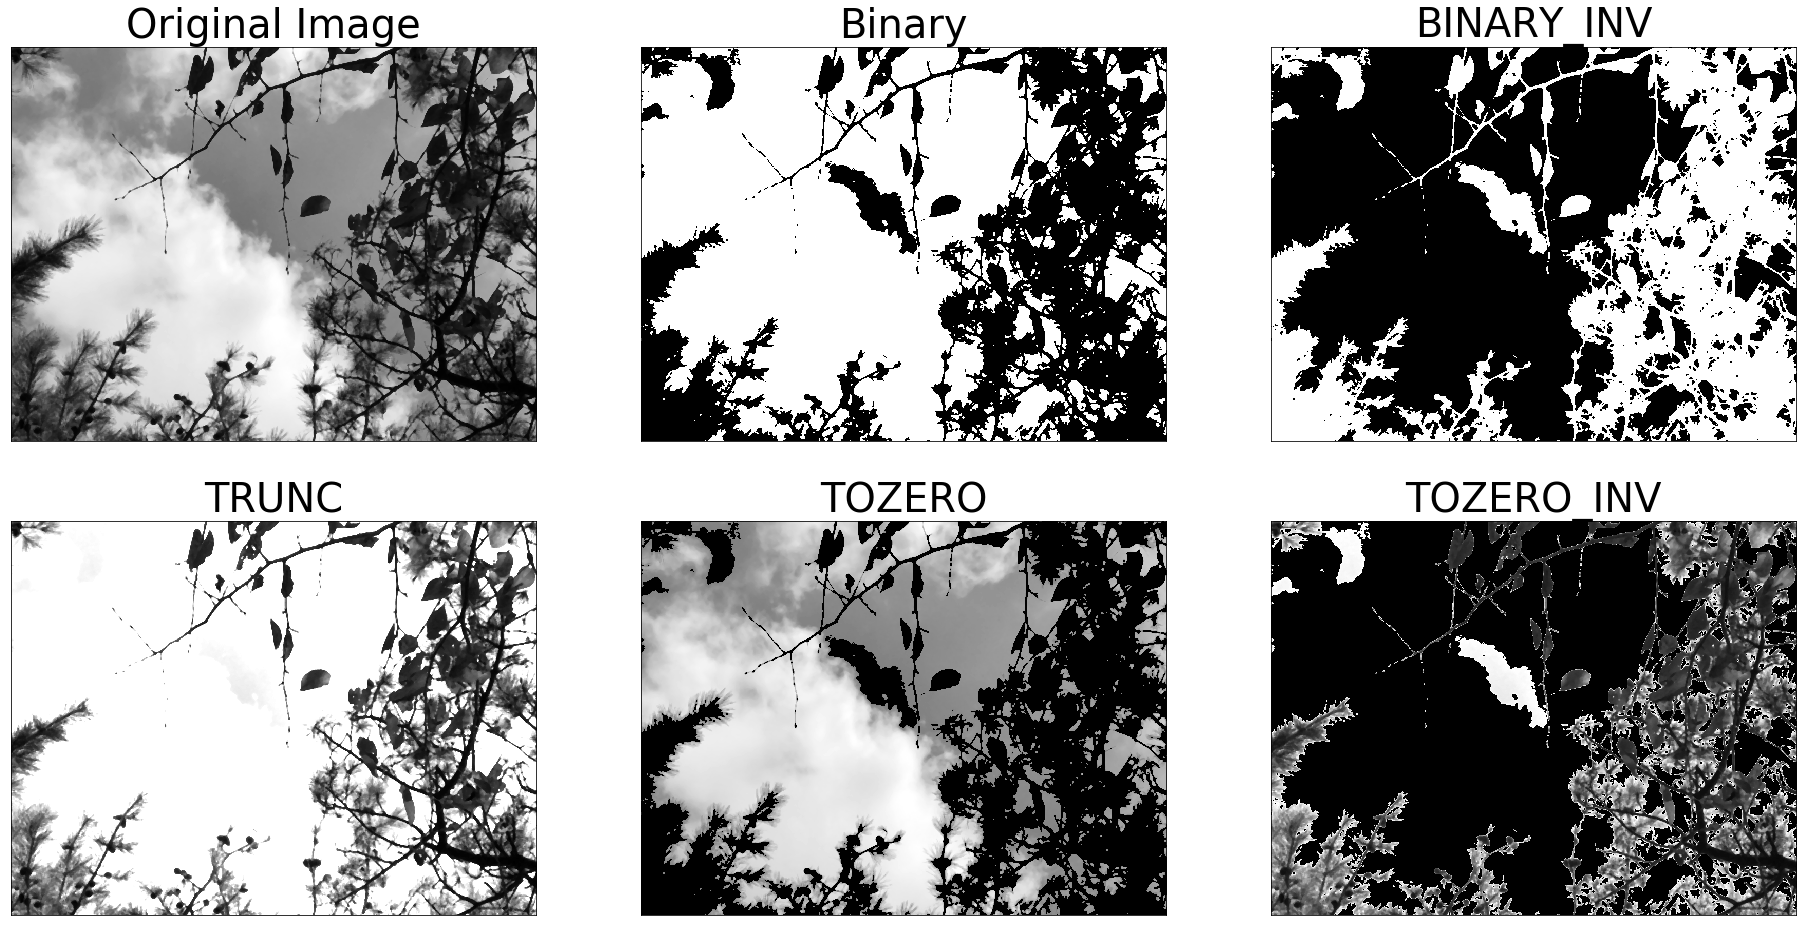

In [3]:
img=cv2.imread('sIMG_2180.jpg',0)
img=cv2.medianBlur(img,5)

ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,th2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,th3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,th4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,th5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles=['Original Image','Binary','BINARY_INV',
'TRUNC','TOZERO', 'TOZERO_INV']
images=[img, th1, th2, th3, th4, th5]

plt.figure(figsize=(32,16))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=40)
    plt.xticks([]),plt.yticks([])
plt.show()

## Adaptive Thresholding

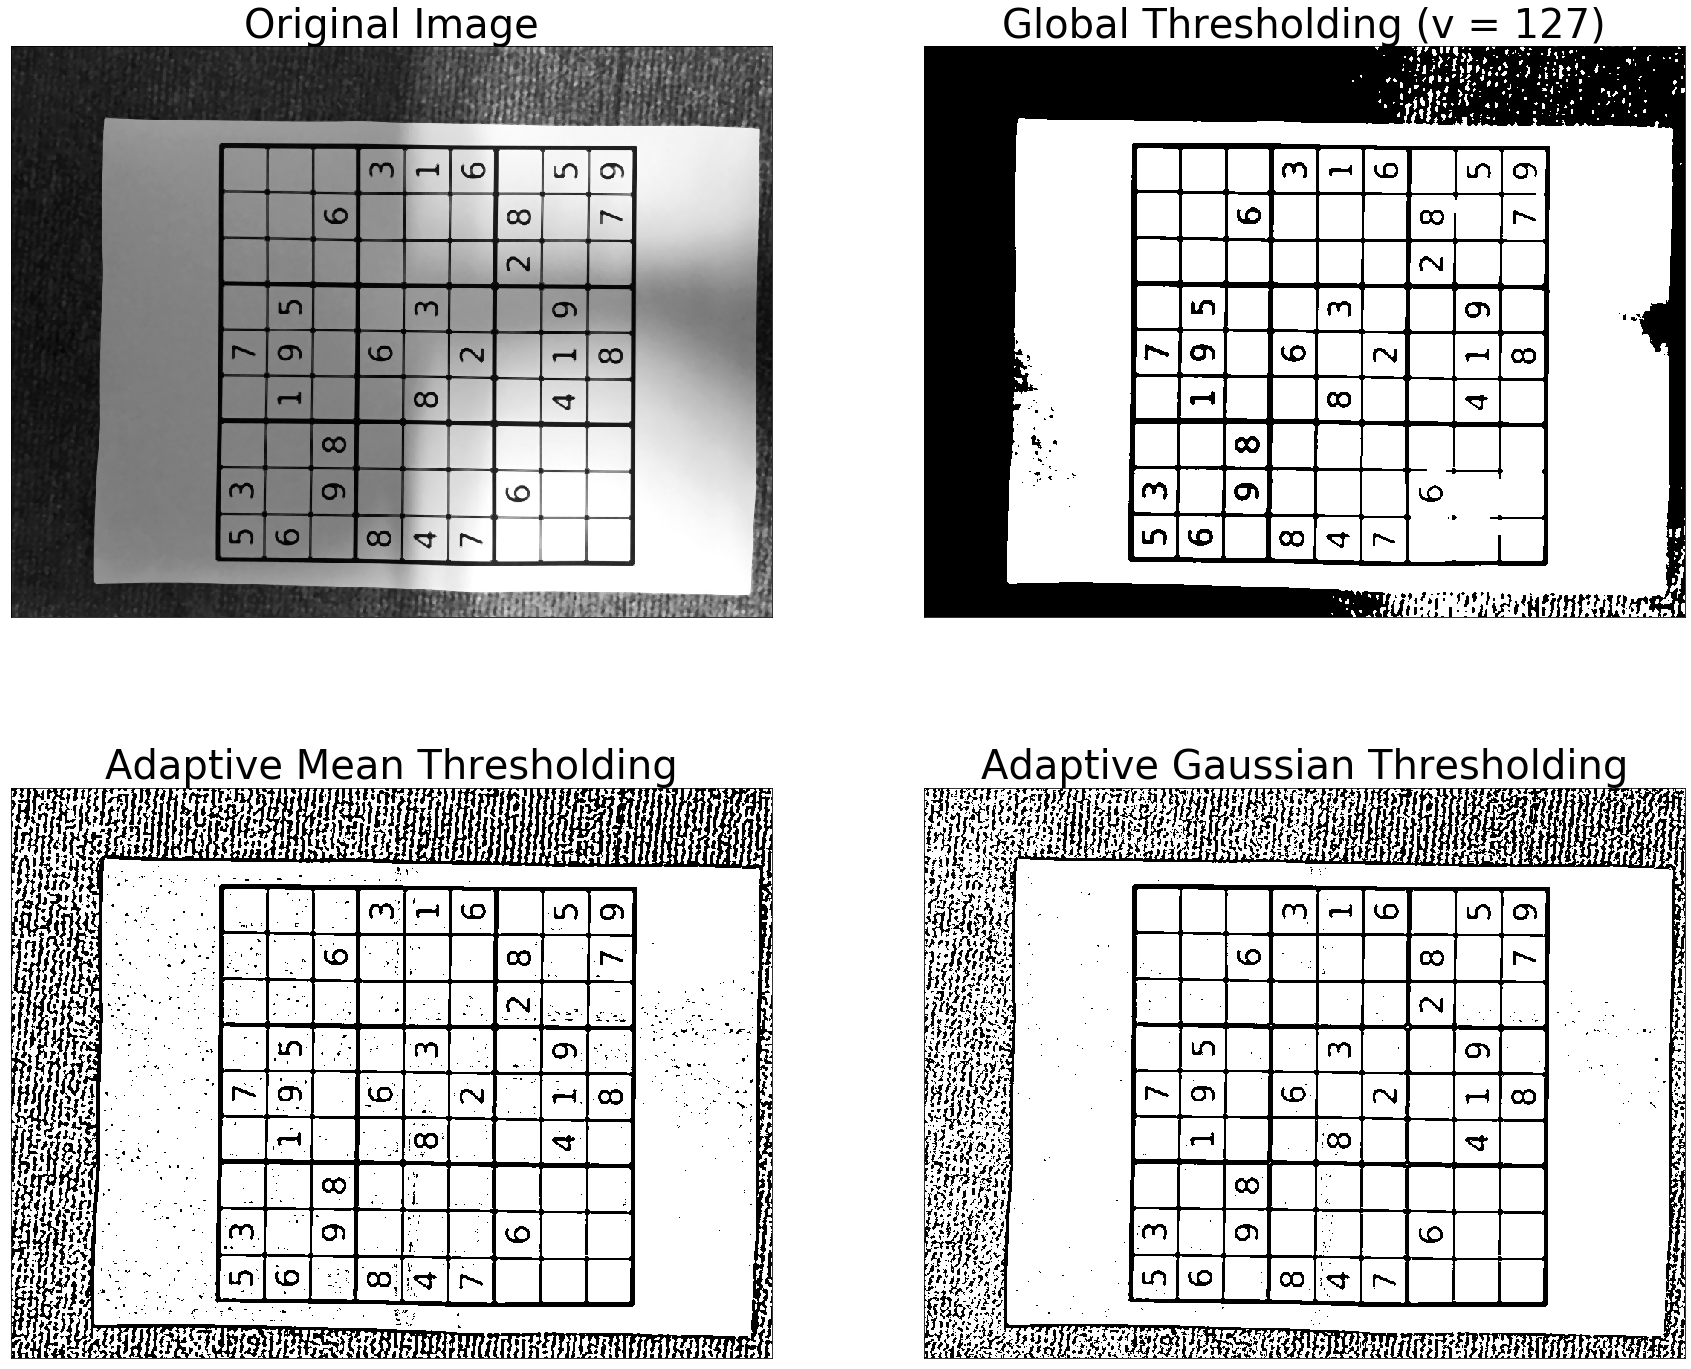

In [4]:
img=cv2.imread('sIMG_2168.jpg',0)
img=cv2.medianBlur(img,5)

ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles=['Original Image','Global Thresholding (v = 127)',
'Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']
images=[img, th1, th2, th3]

plt.figure(figsize=(30,25))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=40)
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu’s Binarization

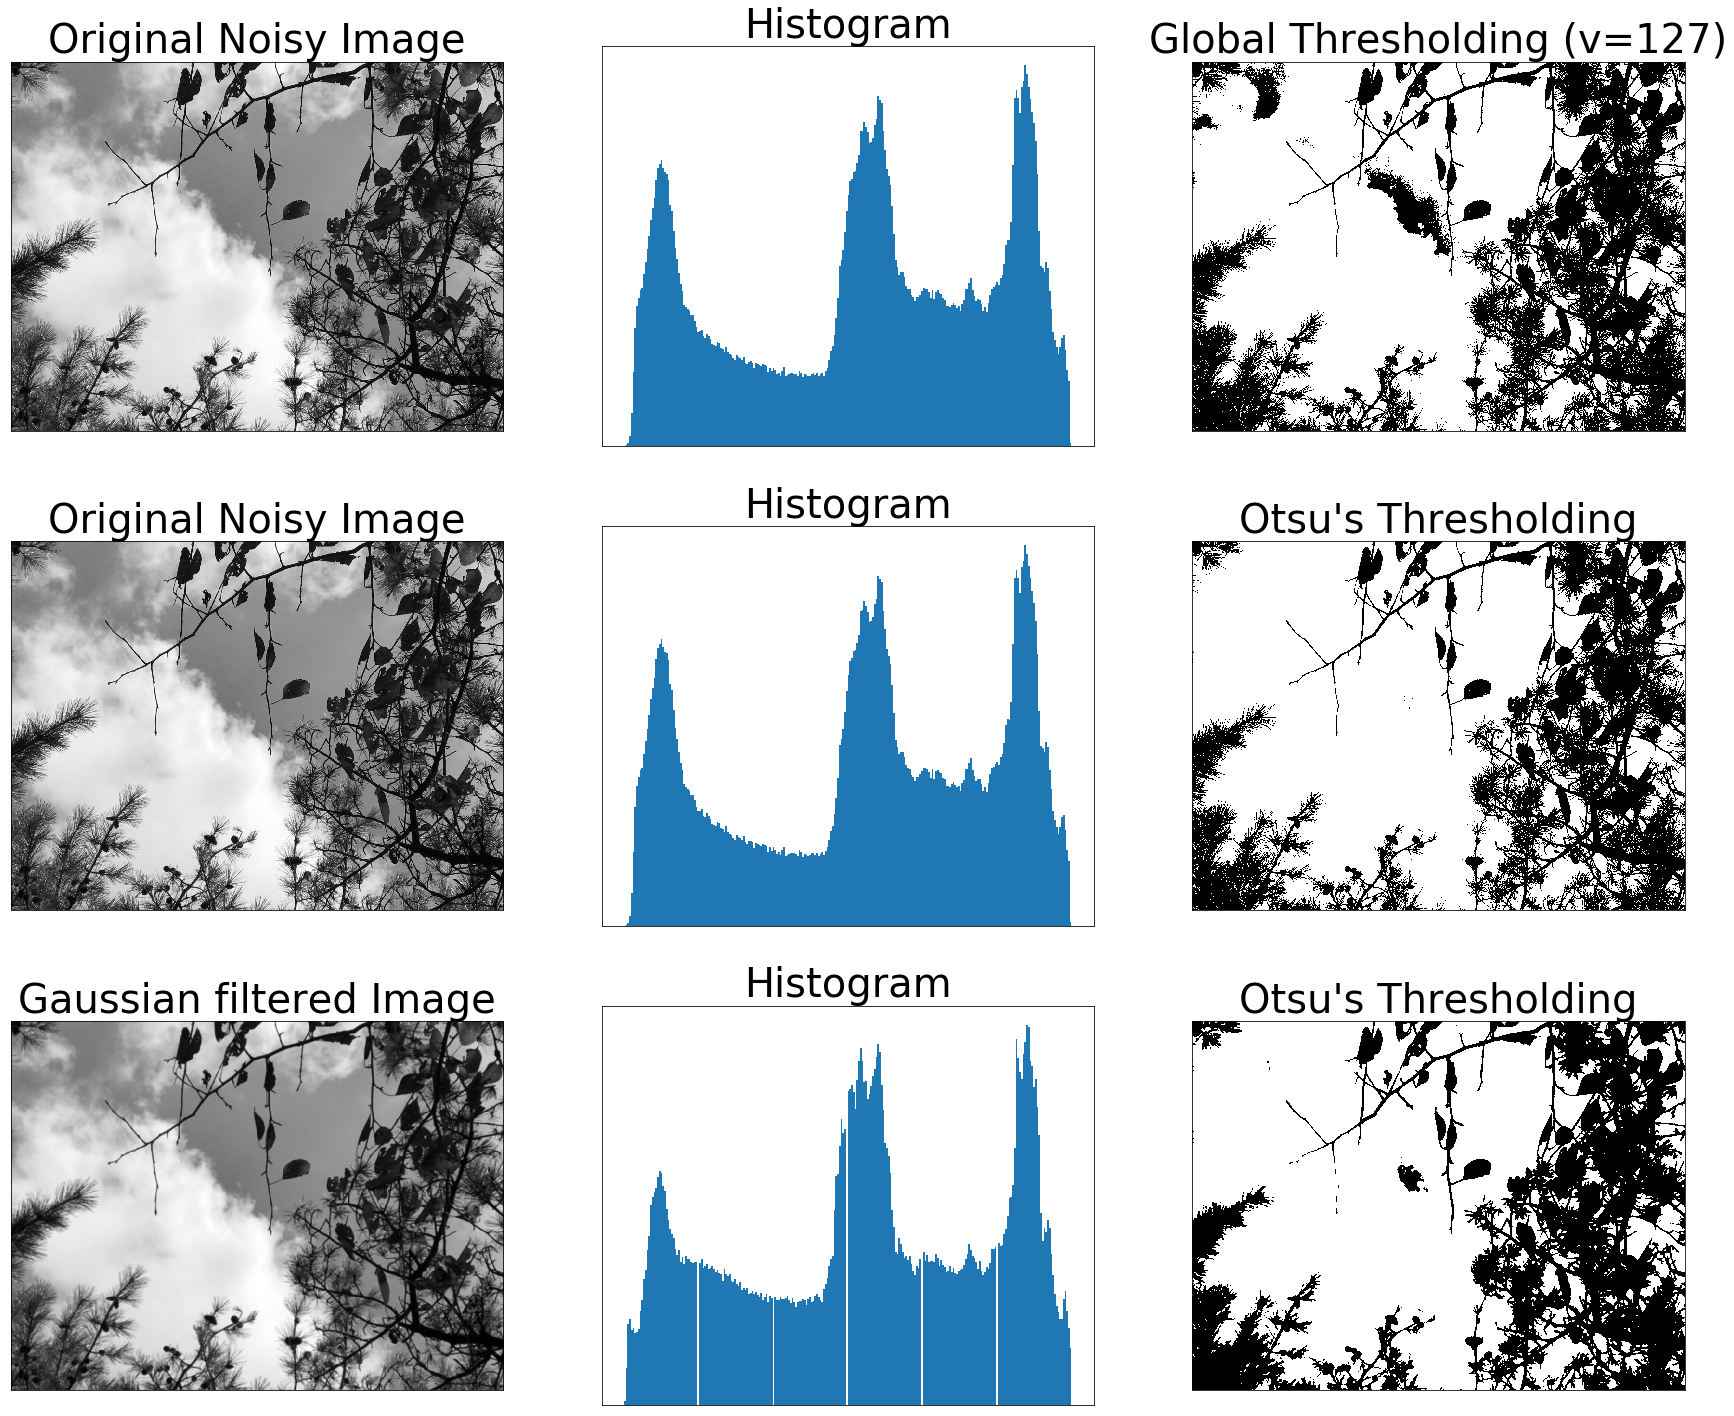

In [5]:
img=cv2.imread('sIMG_2180.jpg',0)

# global thresholding
ret1,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur=cv2.GaussianBlur(img,(5,5),0)
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images=[img,0, th1, img,0, th2, blur,0, th3]
titles=['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

plt.figure(figsize=(30,25))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3], fontsize=40), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1], fontsize=40), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2], fontsize=40), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
img=cv2.imread('sIMG_2180.jpg',0)
blur=cv2.GaussianBlur(img,(5,5),0)

hist=cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm=hist.ravel()/hist.max()
Q=hist_norm.cumsum()

bins=np.arange(256)

fn_min=np.inf
thresh=-1

for i in range(1,256):
    p1,p2=np.hsplit(hist_norm,[i]) # probabilities
    q1,q2=Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2=np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2=np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2=np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    
    # calculates the minimization function
    fn=v1*q1+v2*q2
    if fn<fn_min:
        fn_min=fn
        thresh=i

# find otsu's threshold value with OpenCV function
ret, otsu=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

121 120.0


C:\Users\Laboratory\anaconda3\envs\tf2_gpu\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Laboratory\anaconda3\envs\tf2_gpu\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Laboratory\anaconda3\envs\tf2_gpu\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
